In [1]:
!pip install gensim

In [2]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import re
import gensim
from gensim.models import Word2Vec

In [7]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [22]:
sample_text = """
Machine learning is a field of computer science that gives computers the ability to learn without being explicitly programmed.
It focuses on the development of algorithms that can analyze and interpret patterns in data.
Machine learning is used in a variety of applications such as email filtering, speech recognition, and computer vision.
The algorithms improve their performance as they are exposed to more data over time.
Learning from data enables machines to make predictions and decisions based on past experiences.
"""

In [23]:
sentences = re.sub('[^A-Za-z]+', ' ', sample_text)
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()
sentences = sentences.lower()

In [53]:
all_sentences = sent_tokenize(sentences)
all_words = [word_tokenize(sent) for sent in all_sentences]
print(all_words)

[['machine', 'learning', 'is', 'field', 'of', 'computer', 'science', 'that', 'gives', 'computers', 'the', 'ability', 'to', 'learn', 'without', 'being', 'explicitly', 'programmed', 'it', 'focuses', 'on', 'the', 'development', 'of', 'algorithms', 'that', 'can', 'analyze', 'and', 'interpret', 'patterns', 'in', 'data', 'machine', 'learning', 'is', 'used', 'in', 'variety', 'of', 'applications', 'such', 'as', 'email', 'filtering', 'speech', 'recognition', 'and', 'computer', 'vision', 'the', 'algorithms', 'improve', 'their', 'performance', 'as', 'they', 'are', 'exposed', 'to', 'more', 'data', 'over', 'time', 'learning', 'from', 'data', 'enables', 'machines', 'to', 'make', 'predictions', 'and', 'decisions', 'based', 'on', 'past', 'experiences']]


In [25]:
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

data = all_words
data1 = sum(data, [])
print(data)
print(data1)

[['machine', 'learning', 'field', 'computer', 'science', 'gives', 'computers', 'ability', 'learn', 'without', 'explicitly', 'programmed', 'focuses', 'development', 'algorithms', 'analyze', 'interpret', 'patterns', 'data', 'machine', 'learning', 'used', 'variety', 'applications', 'email', 'filtering', 'speech', 'recognition', 'computer', 'vision', 'algorithms', 'improve', 'performance', 'exposed', 'data', 'time', 'learning', 'data', 'enables', 'machines', 'make', 'predictions', 'decisions', 'based', 'past', 'experiences']]
['machine', 'learning', 'field', 'computer', 'science', 'gives', 'computers', 'ability', 'learn', 'without', 'explicitly', 'programmed', 'focuses', 'development', 'algorithms', 'analyze', 'interpret', 'patterns', 'data', 'machine', 'learning', 'used', 'variety', 'applications', 'email', 'filtering', 'speech', 'recognition', 'computer', 'vision', 'algorithms', 'improve', 'performance', 'exposed', 'data', 'time', 'learning', 'data', 'enables', 'machines', 'make', 'predi

In [33]:
context_target_pairs = []
window_size = 2

In [34]:
for i in range(window_size, len(data1) - window_size):
    context = [data1[i - 2], data1[i - 1], data1[i + 1], data1[i + 2]]
    target = data1[i]
    context_target_pairs.append((context, target))

In [35]:
print("First 5 context-target pairs:")
print(context_target_pairs[:5])

First 5 context-target pairs:
[(['machine', 'learning', 'computer', 'science'], 'field'), (['learning', 'field', 'science', 'gives'], 'computer'), (['field', 'computer', 'gives', 'computers'], 'science'), (['computer', 'science', 'computers', 'ability'], 'gives'), (['science', 'gives', 'ability', 'learn'], 'computers')]


In [36]:
model = Word2Vec(sentences=data, vector_size=50, window=window_size, min_count=1, sg=0)


In [37]:
word = 'learning'
print(f"\nMost similar words to '{word}':")
similar_words = model.wv.most_similar(word)
for sim_word, score in similar_words:
    print(f"{sim_word}: {score:.4f}")


Most similar words to 'learning':
patterns: 0.2711
vision: 0.2409
computers: 0.2106
decisions: 0.1861
learn: 0.1672
based: 0.1609
ability: 0.1503
performance: 0.1456
analyze: 0.1328
machine: 0.1271


In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
from sklearn.decomposition import PCA

In [58]:
X = model.wv[model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

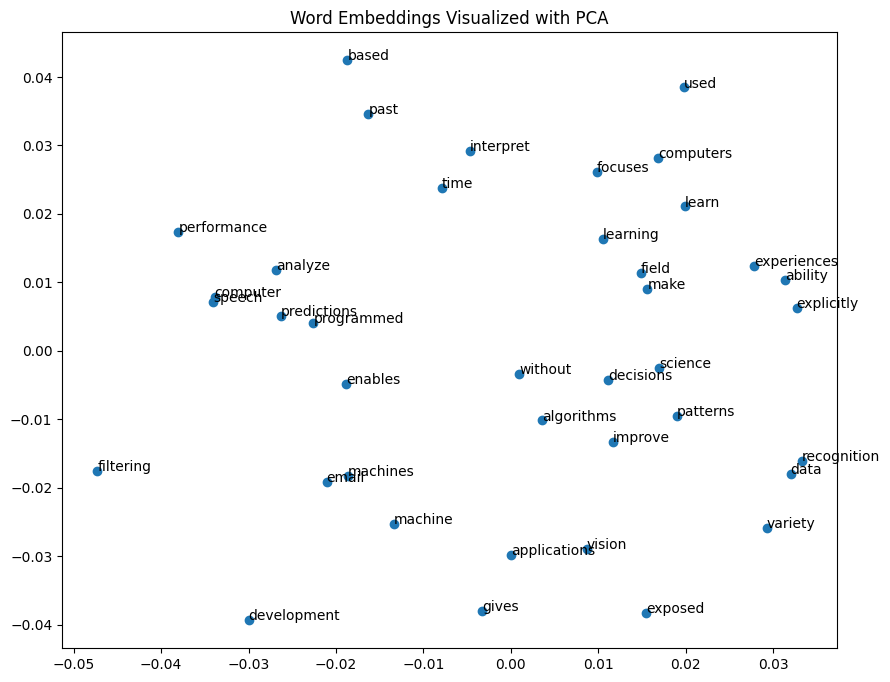

In [59]:
plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:, 1])
words = model.wv.index_to_key

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.title("Word Embeddings Visualized with PCA")
plt.show()